# Playlist Sorter Information Getter
## Gets the tracklist, featurelist and audio analysis list for a given username and playlist

### The user must give the authentication via the browser
Author: Matthew Paras

Date: 9/25/2018

In [1]:
# spotipy_test is my custom script with some helper functions, will get changed later
import spotipy_test as spt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import spotipy
import spotipy.util as util
import json
import pprint
import math
import time
import os

### Select username and playlist
### Gets the tracklist, featurelist, and audio analysis list for the playlist
### Saves these into files for easy access later

## Run this only when switching playlists

In [18]:
SPOTIPY_CLIENT_ID = # your ID here
SPOTIPY_CLIENT_SECRET = # your secret here
SPOTIPY_REDIRECT_URI = 'http://localhost:8888/'

scope = 'playlist-read-private'
username = "frog_bird"
playlist_name = "Stone's Birthday Bash"

token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI)

# reset files
files_to_remove = ["featurelist.json", "testplaylist.json", "tracklist.json"]

for path in files_to_remove:
    if os.path.exists(path):
        os.remove(path)
    else:
        print("The file,", path, "does not exist")

pid, sp = spt.get_playlist_id(token, username, playlist_name)

tracks = spt.get_playlist_tracks(username, pid, sp)
spt.save_to_json('tracklist.json', tracks)

playlist_uris = [item['track']['uri'] for item in tracks]

feature_list = spt.get_features(tracks, sp)
spt.save_to_json('featurelist.json', feature_list)


data = spt.get_playlist_audio_analysis(playlist_uris, sp)
spt.save_to_json('testplaylist.json', data)

spotify:user:frog_bird:playlist:7sPM3F0mjkaeg3IiptdyOD
spotify:track:6epn3r7S14KUqlReYr77hA
analysis retrieved in 5.52 seconds
spotify:track:2VdT56BGpdqNHUgOe1j5vc
analysis retrieved in 4.33 seconds
spotify:track:447yWcDPg1ddgcHBLGpJC0
analysis retrieved in 4.44 seconds
spotify:track:2DH8xbLyluhy3fFgABWd8f
analysis retrieved in 5.25 seconds
spotify:track:0wdkpDfiuJzLM1J9yAtMhD
analysis retrieved in 4.42 seconds
spotify:track:19kuZ0IExry8qYJ4lU2A0r
analysis retrieved in 1.84 seconds
spotify:track:4WrwO9Un3ji5wnNySDGHwQ
analysis retrieved in 2.28 seconds
spotify:track:0V8FYVlBFuXXTIvRnMbZyS
analysis retrieved in 2.07 seconds
spotify:track:6vQN2a9QSgWcm74KEZYfDL
analysis retrieved in 2.28 seconds
spotify:track:7zrpoAJte9o12TzawqgdD0
analysis retrieved in 1.86 seconds
spotify:track:4YOJFyjqh8eAcbKFfv88mV
analysis retrieved in 5.14 seconds
spotify:track:2a1o6ZejUi8U3wzzOtCOYw
analysis retrieved in 2.26 seconds
spotify:track:73334DSX5cb2jnPdvmXvQL
analysis retrieved in 1.55 seconds
spotify:t

## Open files

In [19]:
audio_analysis_list = spt.open_file('testplaylist.json')
feature_list = spt.open_file('featurelist.json')
track_list = spt.open_file('tracklist.json')

## Print contents of playlist

In [20]:
for song in track_list:
    print(song['track']['name'])

# for song in audio_analysis_list:
#     print(song['track']['end_of_fade_in'], "|", song['track']['duration'] - song['track']['start_of_fade_out'])



Baby
Rich & Sad
Better Not (feat. Wafia)
Kinda' Kinky
Macho Man
Jump - Remastered Version
Islands In The Stream
The Climb
Take A Chance On Me
Con Te Partirò
Y.M.C.A.
Danza Kuduro
In Your Eyes
Immigrant Song
Heat Of The Moment
Strangers Like Me
Psycho (feat. Ty Dolla $ign)
It's Strange (feat. K.Flay)
All I Want for Christmas Is You
Midsummer Madness
Boomin
Rotisserie
Dancing Queen
Son of Man
rockstar
Regulate
Congratulations
Hyperreal
Stereo Love - Original
Your Love
A Moment Apart
White Iverson
Africa
Mask Off
Kashmir
Flex Season
1 Thot 2 Thot Red Thot Blue Thot
We Belong - Single Version
Rosanna
Better Now
Stay
Candy Paint
Don't Stop Me Now - Remastered
Another One Bites The Dust - Remastered 2011
Jump Around
Killin' It
Feel It Still
Waterloo
Ocean Avenue
Hold the Line
Killer Queen - Remastered 2011
Mr. Clean
Thick Niggas and Anime Tiddies
I Want It That Way
Call Me Maybe
Laffy Taffy
Sandstorm - Radio Edit
You Make My Dreams - Remastered
Dreams - 2004 Remastered Edition
The Chain - 20

In [125]:
'''
Generate playlist demographics...
'''
# features include
'''
danceability, energy, key, loudness, mode, speechiness, 
acousticness, instrumentalness, liveness, valence, tempo
'''
def feature_hist(feature_name):
    feature_values = [track[feature_name] for track in feature_list if track is not None]
    mean_value = np.mean(np.array(feature_values))
    sd_value = np.std(np.array(feature_values))
    plt.hist(feature_values, align = 'mid', alpha = 0.9, 
             weights=np.ones_like(feature_values)/np.sum(feature_values))
    plt.xlabel(selected_feature)
    plt.ylabel('Frequency')
    plt.title("Histogram of " + feature_name + ": Mean = " + 
              str(round(mean_value, 2)) + ", SD = " + str(round(sd_value, 2)))
    plt.axvline(x = mean_value, color = "r")
    plt.show()
    return

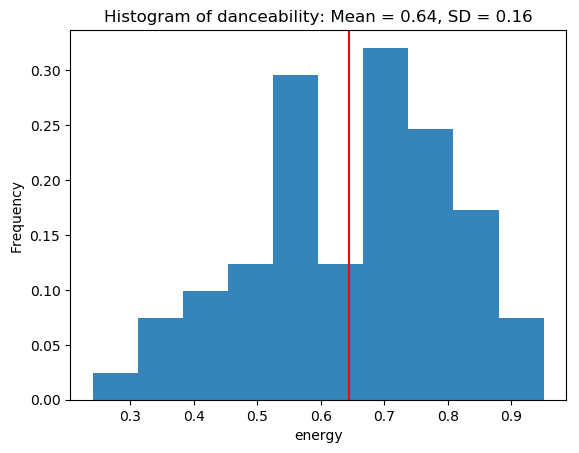

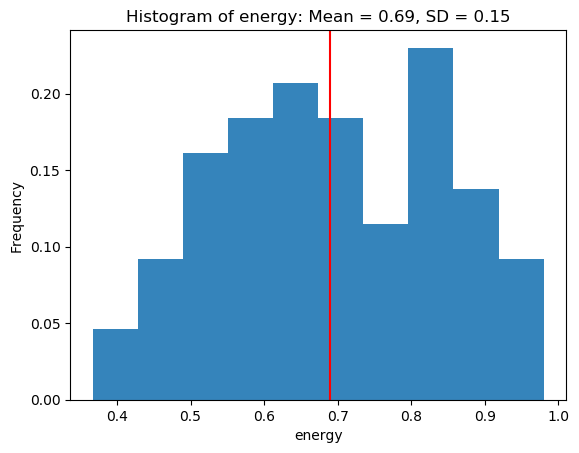

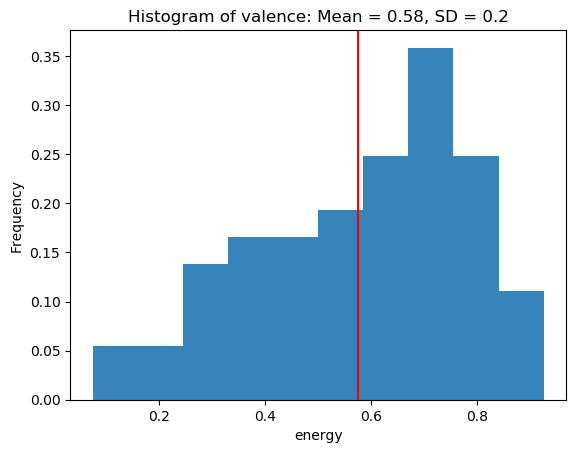

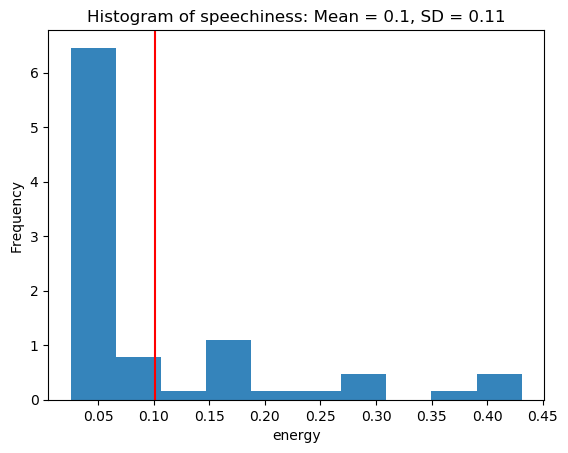

In [127]:
feature_hist("danceability")
feature_hist("energy")
feature_hist("valence")
feature_hist("speechiness")

62.98412698412698


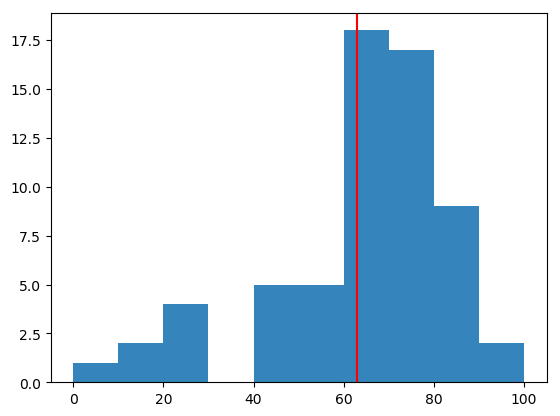

In [73]:
'''
more demographics...
'''
# popularity metrics
popularity_values = [track['track']['popularity'] for track in track_list if track is not None]
mean_value = np.mean(np.array(popularity_values))
plt.hist(popularity_values, range = [0, 100], align = 'mid', alpha = 0.9)
plt.axvline(x = mean_value, color = "r")
print(mean_value)

In [23]:
'''
step backwards in the segments until there is segment with a signficant loudness_start or loudness_max
Find the significant values
'''
def find_ending_segment(audio_analysis):
    threshold = -40
    i = -1
    current_segment = audio_analysis['segments'][i]
    while(current_segment['loudness_max'] < threshold and abs(i < len(audio_analysis['segments']))):
        i -= 1
        current_segment = audio_analysis['segments'][i]
    ending_segment = current_segment
    return ending_segment

In [24]:
'''
step forwards in the segments until there is a segment with a significant loudness
'''
def find_starting_segment(audio_analysis):
    fade_in_time = audio_analysis['track']['end_of_fade_in']
    i = 0
    current_segment = audio_analysis_list[0]['segments'][i]
    while(current_segment['start'] < fade_in_time and i < len(audio_analysis['segments'])):
        i += 1
        current_segment = audio_analysis_list[0]['segments'][i]
    beginning_segment = current_segment
    return beginning_segment

{'num_samples': 4917739, 'duration': 223.02671, 'sample_md5': '', 'offset_seconds': 0, 'window_seconds': 0, 'analysis_sample_rate': 22050, 'analysis_channels': 1, 'end_of_fade_in': 0.37138, 'start_of_fade_out': 223.02672, 'loudness': -5.134, 'tempo': 120.119, 'tempo_confidence': 0.463, 'time_signature': 4, 'time_signature_confidence': 1.0, 'key': 1, 'key_confidence': 0.008, 'mode': 0, 'mode_confidence': 0.234, 'code_version': 3.15, 'echoprint_version': 4.12, 'synch_version': 1.0, 'rhythm_version': 1.0}
['Eb', 'Gb', 'G']


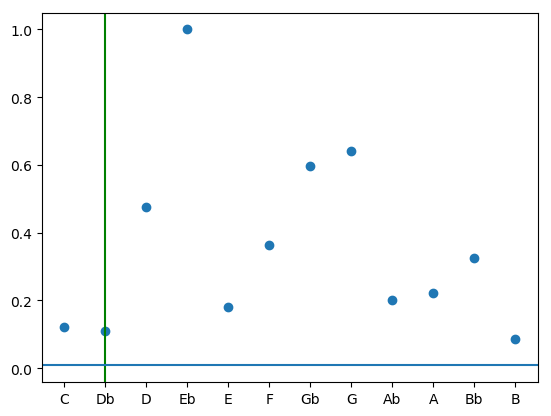

In [25]:
'''
attempt to analyze pitch distribution at a given segment
'''

index = 3
test_segment = find_starting_segment(audio_analysis_list[index])
print(audio_analysis_list[index]['track'])
# print(test_segment)
pitch_vector = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

plt.style.use('default')
plt.xticks(list(range(len(test_segment['pitches']))), pitch_vector)
plt.plot(list(range(len(test_segment['pitches']))), test_segment['pitches'], 'o')
mean_pitch = np.mean(np.array(test_segment['pitches']))
pitch_sd = np.std(np.array(test_segment['pitches']))
plt.axvline(x=audio_analysis_list[index]['track']['key'], color = 'g')
plt.axhline(y=audio_analysis_list[index]['track']['key_confidence'])
# plt.axhline(y=mean_pitch, color='r')
# plt.axhline(y=mean_pitch + pitch_sd / 2, color = 'y')

pitches = []
for i in range(len(test_segment['pitches'])):
    if test_segment['pitches'][i] >= mean_pitch + pitch_sd / 2:
        pitches.append(i)

pitch_names = [pitch_vector[i] for i in pitches]
print(pitch_names)


{'start': 1.77143, 'duration': 0.24295, 'confidence': 1.0, 'loudness_start': -32.795, 'loudness_max_time': 0.02025, 'loudness_max': -17.921, 'pitches': [0.131, 0.085, 0.125, 0.09, 0.333, 0.125, 0.095, 1.0, 0.287, 0.908, 0.19, 0.129], 'timbre': [38.055, -20.821, -27.835, 26.219, -5.635, -14.838, -37.479, -26.684, 2.673, 17.581, -24.378, -11.123]}


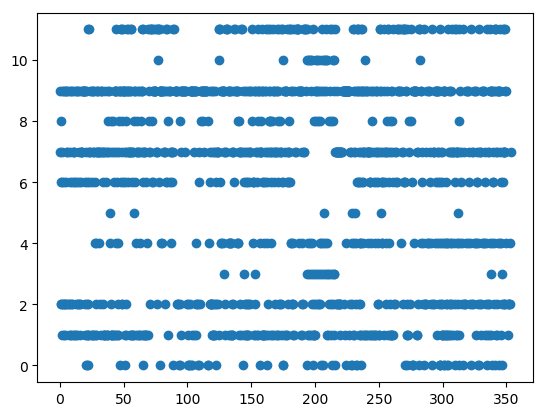

In [9]:
'''
plot max pitch over time
'''
index = 8
current_song = audio_analysis_list[index]

# for segment in current_song['segments']:
    

print(current_song['segments'][index])


segment_times = [x['start'] for x in current_song['segments']]
pitch_values = [x['pitches'].index(max(x['pitches'])) for x in current_song['segments']]
plt.plot(segment_times, pitch_values, 'o')


264.3066615746736
1.47413325649869


<function matplotlib.pyplot.show(*args, **kw)>

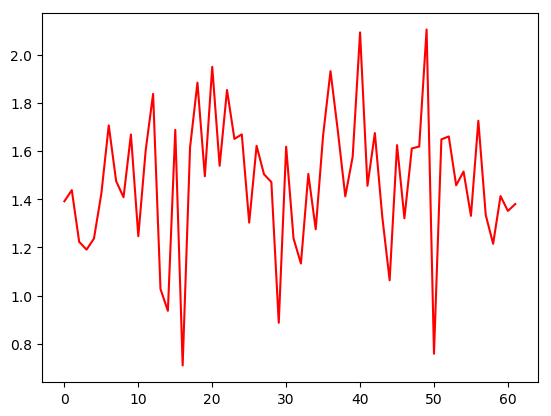

In [35]:
'''
find difference vector for pitches at the end of the song and the beginning of the next
also match timbre at the beginning and end of songs

'''

timbre_differences = []
pitch_differences = []
for i in range(len(audio_analysis_list) - 1):
    current_song = audio_analysis_list[i]
    next_song = audio_analysis_list[i + 1]
    
    ending_segment = find_ending_segment(current_song)
    starting_segment = find_starting_segment(next_song)
    
    timbre_df = np.linalg.norm(np.array(ending_segment['timbre'] - np.array(starting_segment['timbre'])))
    pitch_df = np.linalg.norm(np.array(ending_segment['pitches'] - np.array(starting_segment['pitches'])))
    
    timbre_differences.append(timbre_df)
    pitch_differences.append(pitch_df)
    
# print(timbre_differences)
print(np.mean(np.array(timbre_differences)))
print(np.mean(np.array(pitch_differences)))
# print(pitch_differences)

# plt.style.use('dark_background')
plt.plot(list(range(len(audio_analysis_list) - 1)), pitch_differences, '-r')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

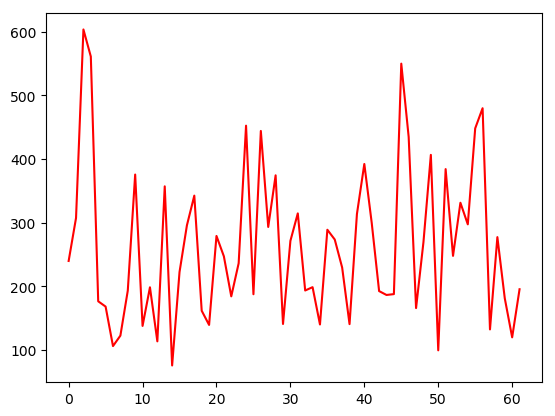

In [129]:
plt.plot(list(range(len(audio_analysis_list) - 1)), timbre_differences, '-r')
plt.show

9.975451944203494
5.373828591696776


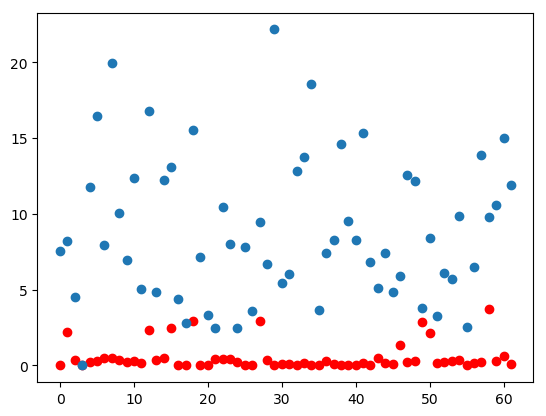

In [41]:
'''
Give a playlist a score based on its continuity
transition -> math.log(fade_out + 1) - fade_in -- keep above 0

'''
import math
from random import shuffle

# shuffle(audio_analysis_list)

transitions = []
list_of_fade_out = []
list_of_fade_in = []
for i in range(len(audio_analysis_list) - 1):
    current_song = audio_analysis_list[i]
    next_song = audio_analysis_list[i + 1]
    fade_out = current_song['track']['duration'] - current_song['track']['start_of_fade_out']
    fade_in = next_song['track']['end_of_fade_in']
    # print(fade_out, fade_in)
    # print(math.log(fade_out + 1) - fade_in)
    # transitions.append(fade_out + fade_out*fade_in)
    transitions.append(fade_out*fade_in)
    list_of_fade_out.append(fade_out)
    list_of_fade_in.append(fade_in)
    

plt.plot(list(range(len(audio_analysis_list) - 1)), list_of_fade_in, 'ro')
plt.plot(list(range(len(audio_analysis_list) - 1)), list_of_fade_out, 'o')
plt.show

print(np.std(np.array(transitions)))
print(np.mean(np.array(transitions)))

# print(transitions)


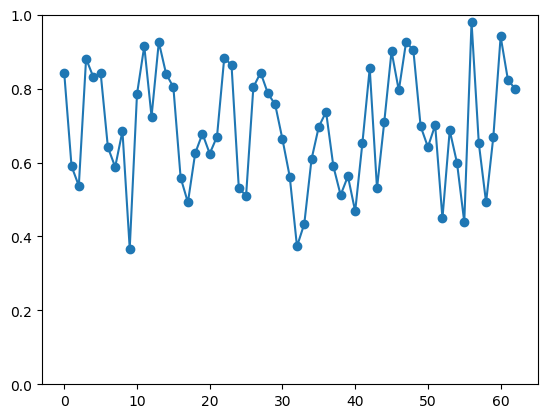

In [43]:
'''
given a feature list (from a playlist), plots that feature vs track # in playlist
'''
selected_feature = "energy"

feature_values = [track[selected_feature] for track in feature_list if track is not None]
plt.plot(list(range(len(feature_values))), feature_values, '-o')
plt.ylim(0, 1)
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()


In [ ]:
import numpy as np
fade_in_order = sorted(testlist, key = lambda k: k['fade_in_length'])
fade_out_order = sorted(testlist, key = lambda k: k['fade_out_length'], reverse = True)
energy_order = sorted(testlist, key = lambda k: k['audio_features']['energy'])

ordered_songs = []
current_song = energy_order.pop(int(round(len(energy_order) / 2)))

ordered_songs.append(current_song)

# every 4 songs
timer = "decreasing"

i = 0
energy_multiplier = 1
danceability_multiplier = 1    
valence_multiplier = 1

while(energy_order):
    # look at pair-wise relationship
    song_separation_times = [x['fade_out_length'] - current_song['fade_in_length'] for x in energy_order]
    normalized_times = np.array([float(i)/min(song_separation_times) for i in song_separation_times])
    
    energy_differences = np.absolute(np.array([x['audio_features']['energy'] - current_song['audio_features']['energy'] 
                         for x in energy_order]))
    
    normalized_energy = np.array([float(i)/max(energy_differences) for i in energy_differences])
    
    
    danceability_differences = -1 * np.array([current_song['audio_features']['danceability'] 
                                         - x['audio_features']['danceability'] for x in energy_order])
    
    
    valence_differences = np.absolute(np.array([x['audio_features']['valence'] 
                                    - current_song['audio_features']['valence'] for x in energy_order]))
    normalized_valence = np.array([float(i)/max(valence_differences) for i in valence_differences])
    
    tempo_differences = np.absolute(np.array([x['audio_features']['tempo']-current_song['audio_features']['tempo'] 
                                  for x in energy_order]))
    normalized_tempo = np.array([float(i)/max(tempo_differences) for i in tempo_differences])
    
    ####### increase, decrease, increase, decrease ...
#     if i % 4 == 0:
#         if(energy_multiplier == 1):
#             energy_multiplier = -1
#         else:
#             energy_multiplier = 1
    
#     if i % 6 == 0:
#         if(valence_multiplier == 1):
#             valence_multiplier == -1
#         else:
#             valence_multiplier == 1
    # print(timer)
    
    
    # how to pick "best available"
    # make it ideal to max value
    
    objective_function = 3*normalized_times + .5*(normalized_energy * energy_multiplier) 
    - .5*normalized_tempo + valence_multiplier*normalized_valence
    
    next_song_index = objective_function.tolist().index(max(objective_function))
    
    
    
    current_song = energy_order.pop(next_song_index)
    ordered_songs.append(current_song)
    i += 1

for i in range(len(ordered_songs)-1):
    song1 = ordered_songs[i]
    song2 = ordered_songs[i+1]
    print(song1['name'], "|" ,song2['name'])
    print(song1['fade_out_length'], "|",song2['fade_in_length'])
    # print(song1['audio_features']['energy'], "|", song2['audio_features']['energy'])





In [13]:
'''
given a feature list (from a playlist), plots that feature vs track # in playlist
'''
selected_feature = "energy"

feature_values = [track['audio_features'][selected_feature] for track in ordered_songs if track is not None]
plt.plot(list(range(len(feature_values))), feature_values, '-o')
# plt.ylim(0, 1)
plt.show()


NameError: name 'ordered_songs' is not defined

In [ ]:
spt.loudness_plot(audio_analysis_list[1])


In [ ]:
new_playlist_uris = [x['spotifyid'] for x in ordered_songs]

In [ ]:
SPOTIPY_CLIENT_ID = # your ID here
SPOTIPY_CLIENT_SECRET = # your secret here
SPOTIPY_REDIRECT_URI = 'http://localhost:8888/'

scope = 'playlist-modify-public'
username = "frog_bird"
playlist_name = "My Test Playlist"


sp.make_new_playlist("My Test Playlist")

In [ ]:
scope = 'playlist-read-private'

token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI)



def get_playlist_id(username, playlist_id):
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.current_user_playlists()
        for item in results['items']:
            track = item['name']
            if(track == playlist_name):
                pid = item['uri']
                print(pid)
    else:
        print("Can't get token for", username)
    
    return pid, sp

playlistid, spot = get_playlist_id(username, playlist_name)

In [ ]:
token = util.prompt_for_user_token(username, "playlist-modify-public", client_id=SPOTIPY_CLIENT_ID,
client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI)

sp = spotipy.Spotify(auth=token)

sp.user_playlist_add_tracks(username, playlistid, new_playlist_uris)